In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
from scipy.spatial.distance import pdist, squareform

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
processed_dir = TOP +'data/processed/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
import genra

In [4]:
df  = pd.read_csv(interim_dir+'oral_10pte_smi_020723.csv', index_col = [0])

In [5]:
df1 = df.set_index('DSSTox_Substance_Id')

In [6]:
df1

,Substance_Name,Structure_MolWt,Structure_SMILES,Structure_SMILES_2D-QSAR,10ptile_POD,pPOD
DSSTox_Substance_Id,,,,,,
DTXSID001004378,4-tert-Butylcyclohexyl prop-2-enoate,210.317,CC(C)(C)C1CCC(CC1)OC(=O)C=C,CC(C)(C)C1CCC(CC1)OC(=O)C=C,150.00,0.146783
DTXSID001005033,"Bis(2-ethylhexyl) cyclohexane-1,4-dicarboxylate",396.612,CCCCC(CC)COC(=O)C1CCC(CC1)C(=O)OCC(CC)CCCC,CCCCC(CC)COC(=O)C1CCC(CC1)C(=O)OCC(CC)CCCC,280.00,0.151208
DTXSID001006300,"6-[(1-Hydroxy-2,4-dimethylheptylidene)amino]he...",420.591,OCCN(CCO)CCO.CCCC(C)CC(C)C(O)=NCCCCCC(O)=O,CCCC(C)CC(C)C(=O)NCCCCCC(O)=O,550.00,-0.116503
DTXSID001009930,Thialdine,163.300,C[C@H]1N[C@@H](C)S[C@@H](C)S1,CC1NC(C)SC(C)S1,9.30,1.244503
DTXSID001014636,1-(2-Hydroxy-3-sulphonatopropyl)pyridinium,217.240,OC(C[N+]1=CC=CC=C1)CS([O-])(=O)=O,OC(C[N+]1=CC=CC=C1)CS([O-])(=O)=O,1000.00,-0.663060
...,...,...,...,...,...,...
DTXSID90968887,Methyl 3-sulfanylbutanoate,134.190,COC(=O)CC(C)S,COC(=O)CC(C)S,0.06,3.349569
DTXSID90976780,3-[(2-Methylfuran-3-yl)sulfanyl]butan-2-one,184.250,CC(SC1=C(C)OC=C1)C(C)=O,CC(SC1=C(C)OC=C1)C(C)=O,3.76,1.690220
DTXSID90978461,Heptane-2-thiol,132.270,CCCCCC(C)S,CCCCCC(C)S,0.06,3.343310


In [7]:
MOLS = dict(zip(df['DSSTox_Substance_Id'], df['Structure_SMILES_2D-QSAR']))
MOLS = {k:Chem.MolFromSmiles(v) for k,v in MOLS.items()}
MOLS = {i:j for i,j in MOLS.items() if j}
Morgan_FP = pd.DataFrame([np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,1024)) for i in MOLS.values()])
Morgan_FP.index=MOLS.keys()
Morgan_FP.columns = ['mrgn_%d'%i for i in Morgan_FP.columns]

In [8]:
Morgan_FP

,mrgn_0,mrgn_1,mrgn_2,mrgn_3,mrgn_4,mrgn_5,mrgn_6,mrgn_7,mrgn_8,mrgn_9,...,mrgn_1014,mrgn_1015,mrgn_1016,mrgn_1017,mrgn_1018,mrgn_1019,mrgn_1020,mrgn_1021,mrgn_1022,mrgn_1023
DTXSID001004378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
DTXSID001005033,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
DTXSID001006300,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID001009930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
DTXSID001014636,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID90968887,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID90976780,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
DTXSID90978461,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID90990466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
I = Morgan_FP.index.intersection(df1.index)
X,y = Morgan_FP.loc[I],df1.loc[I,'pPOD']

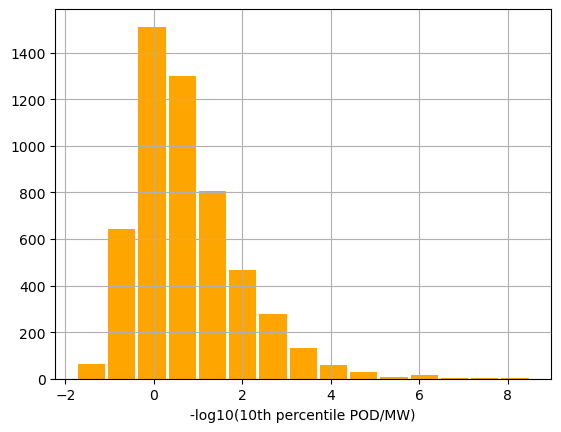

In [10]:
y.hist(bins=15,rwidth=0.9,color='orange')
plt.xlabel('-log10(10th percentile POD/MW)')
plt.savefig(figures_dir+'pPOD_hist_020723.png', dpi = 300)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display = 'diagram')
from genra.rax.skl.reg import GenRAPredValue
from sklearn.metrics import make_scorer,explained_variance_score,roc_auc_score,r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict,LeaveOneOut, cross_validate
from genra.rax.skl.reg import *

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
print(X_train.shape, y_train.shape, y_test.shape)

(4256, 1024) (4256,) (1065,)


In [14]:
GP1 = GenRAPredValue(algorithm='brute', metric = 'jaccard')

params={'n_neighbors': range(1,15)
       }

In [22]:
inner_cv = KFold(n_splits = 10)
outer_cv = KFold(n_splits = 10)


In [23]:
model = GridSearchCV(
    estimator=GP1, param_grid=params, cv= inner_cv, scoring = 'neg_root_mean_squared_error', n_jobs=-1)

In [40]:
model.fit(X_train, y_train).best_params_

{'n_neighbors': 7}

In [35]:
scores = []
for est in cv_results[0]['estimator']:
    scores.append([est.best_params_, -est.best_score_])

In [44]:
-cv_results[0]['test_score'].mean(), cv_results[0]['test_score'].std()

(0.913969490491526, -0.051458116506492485)

In [25]:
cv_results = cross_validate(model, X_train, y_train, cv=outer_cv, scoring = 'neg_root_mean_squared_error',n_jobs=-1,  return_estimator = True),

/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but GenRAPredValue was fitted with feature names
  warnings.warn(
/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but GenRAPredValue was fitted with feature names
  warnings.warn(
/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but GenRAPredValue was fitted 

In [46]:
index_columns = [f"param_{name}" for name in params.keys()]
columns = index_columns + ["mean_test_score"]

inner_cv_results = []
for cv_idx, estimator in enumerate(cv_results[0]["estimator"]):
    search_cv_results = pd.DataFrame(estimator.cv_results_)
    search_cv_results = search_cv_results[columns].set_index(index_columns)
    search_cv_results = search_cv_results.rename(
        columns={"mean_test_score": f"CV {cv_idx}"})
    inner_cv_results.append(search_cv_results)
inner_cv_results = pd.concat(inner_cv_results, axis=1).T

/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future vers

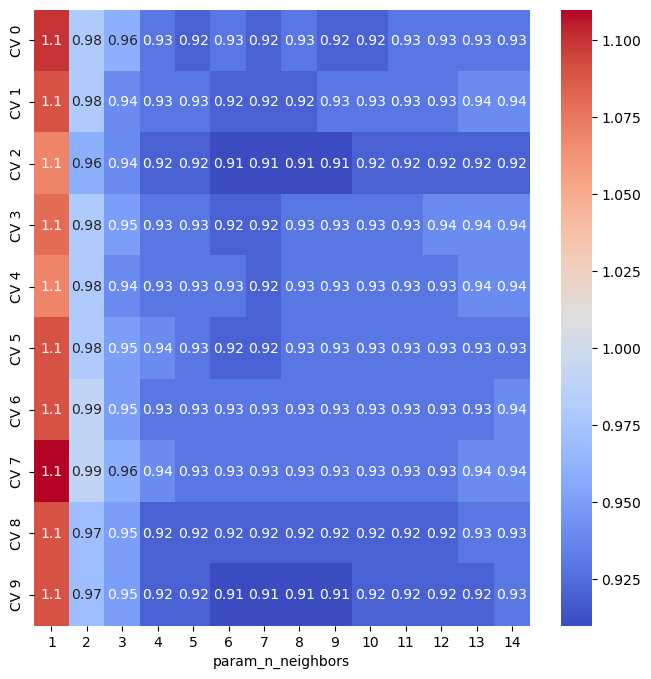

In [59]:
plt.figure(figsize = (8,8))
sns.heatmap(np.round(-inner_cv_results, 2), cmap = 'coolwarm', annot = True,)
plt.savefig(figures_dir+'hm_innerCV.png', dpi = 300)

In [60]:
Best = GenRAPredValue(n_neighbors=7,algorithm='brute',metric='jaccard',n_jobs=-1)

In [62]:
Best.fit(X_train,y_train)

GenRAPredValue(algorithm='brute', metric='jaccard', n_jobs=-1, n_neighbors=7)

In [64]:
y_preds = Best.predict(X_test)

/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but GenRAPredValue was fitted with feature names
  warnings.warn(
/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [72]:
len(y_preds)

1065

In [74]:
len(y_test)

1065

In [75]:
y_test

DTXSID3040649      0.744113
DTXSID9031939     -0.135689
DTXSID701031497    1.314951
DTXSID80859174    -1.752346
DTXSID10194681    -0.059072
                     ...   
DTXSID3022536      0.627964
DTXSID40864027     0.401783
DTXSID0023086      0.111194
DTXSID7025920     -0.153366
DTXSID5020027      3.187099
Name: pPOD, Length: 1065, dtype: float64

In [80]:
y_test_df = y_test.reset_index()
y_test_df['pred_y'] = y_preds

In [82]:
y_test_df.head()

,index,pPOD,pred_y
0,DTXSID3040649,0.744113,0.658744
1,DTXSID9031939,-0.135689,1.015789
2,DTXSID701031497,1.314951,-0.289710
3,DTXSID80859174,-1.752346,-0.389205
4,DTXSID10194681,-0.059072,-0.205172


$R^2$ score= 0.360
RMSE=0.956



<Figure size 1200x1000 with 0 Axes>

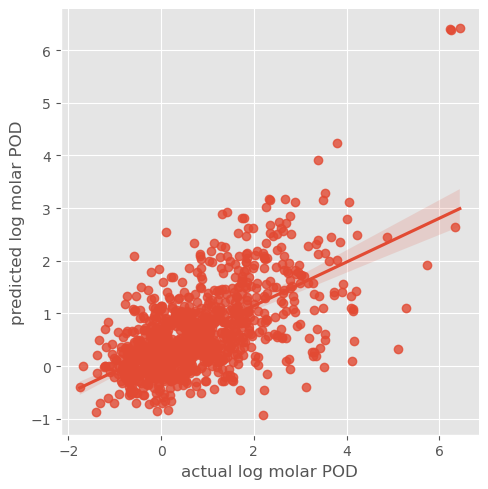

In [84]:
plt.style.use('ggplot')
plt.figure(figsize = (12,10))

g = sns.lmplot(x = 'pPOD', y = 'pred_y', data = y_test_df )
g.set_axis_labels("actual log molar POD", "predicted log molar POD")

print("$R^2$ score= {:.3f}\nRMSE={:0.3f}\n"\
              .format(r2_score(y_test_df['pPOD'],y_test_df['pred_y']),
                      np.sqrt(((y_test_df['pPOD']-y_test_df['pred_y'])**2).mean())))


In [231]:
X

,mrgn_0,mrgn_1,mrgn_2,mrgn_3,mrgn_4,mrgn_5,mrgn_6,mrgn_7,mrgn_8,mrgn_9,...,mrgn_1014,mrgn_1015,mrgn_1016,mrgn_1017,mrgn_1018,mrgn_1019,mrgn_1020,mrgn_1021,mrgn_1022,mrgn_1023
DTXSID001004378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
DTXSID001005033,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
DTXSID001006300,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID001009930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
DTXSID001014636,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID90968887,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID90976780,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
DTXSID90978461,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID90990466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
target_fp = pd.read_csv(processed_dir+'targets_020723.csv')

In [86]:
target_fp = target_fp.set_index('Unnamed: 0')

In [87]:
target_fp.index.name = None

In [88]:
target_fp

,mrgn_0,mrgn_1,mrgn_2,mrgn_3,mrgn_4,mrgn_5,mrgn_6,mrgn_7,mrgn_8,mrgn_9,...,mrgn_1014,mrgn_1015,mrgn_1016,mrgn_1017,mrgn_1018,mrgn_1019,mrgn_1020,mrgn_1021,mrgn_1022,mrgn_1023
DTXSID4027315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID1027269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID5026914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID4027367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID9047596,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID4020539,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID6040111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID4042206,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID501104446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [89]:
all_df = pd.concat([X,target_fp])

In [90]:
all_df.shape

(5591, 1024)

In [91]:
all_df.index.nunique()

5374

In [92]:
all_df = all_df[~all_df.index.duplicated(keep='first')] 

In [93]:
from scipy.spatial.distance import pdist, squareform

D_mgrn = pd.DataFrame(squareform(pdist(all_df, 'jaccard')), columns = all_df.index, index = all_df.index)
S_mgrn = 1-D_mgrn
S_mgrn.head()

,DTXSID001004378,DTXSID001005033,DTXSID001006300,DTXSID001009930,DTXSID001014636,DTXSID001016432,DTXSID001016713,DTXSID001018107,DTXSID001019355,DTXSID001019393,...,DTXSID6052245,DTXSID6060393,DTXSID2062371,DTXSID9029146,DTXSID8025468,DTXSID0024395,DTXSID2021947,DTXSID8060169,DTXSID801023845,DTXSID5041439
DTXSID001004378,1.000000,0.145161,0.069444,0.042553,0.048387,0.045455,0.092784,0.076923,0.050847,0.071429,...,0.102041,0.083333,0.037037,0.066667,0.025000,0.131579,0.062500,0.016667,0.054054,0.031746
DTXSID001005033,0.145161,1.000000,0.138889,0.080000,0.060606,0.133333,0.132653,0.095745,0.116667,0.126761,...,0.092593,0.073171,0.070175,0.039216,0.121951,0.142857,0.166667,0.015385,0.060870,0.060606
DTXSID001006300,0.069444,0.138889,1.000000,0.034483,0.070423,0.117647,0.125000,0.058252,0.073529,0.211268,...,0.048387,0.086957,0.030769,0.017241,0.106383,0.080000,0.127273,0.014085,0.049180,0.055556
DTXSID001009930,0.042553,0.080000,0.034483,1.000000,0.021277,0.035714,0.034884,0.025316,0.097561,0.017544,...,0.121212,0.000000,0.026316,0.068966,0.043478,0.040000,0.062500,0.023256,0.010101,0.021277
DTXSID001014636,0.048387,0.060606,0.070423,0.021277,1.000000,0.097561,0.071429,0.065934,0.016667,0.072464,...,0.039216,0.085714,0.057692,0.000000,0.052632,0.050000,0.063830,0.090909,0.064220,0.103448


In [94]:
def nearest_neighbour(S, target, n = 10):
    t_m =S[target].values
    ids_chem = {i:x for i, x in enumerate(S.index)}
    temp_chem = np.argpartition(-t_m, n)
    chem_nn = temp_chem[:n]
    nn_chem = [ids_chem[x] for x in chem_nn]
    mydict = {k:v for k,v in list(zip(nn_chem,t_m[chem_nn]))}
    df = pd.DataFrame(mydict.items(), columns = ['DTXSID', 'Jaccard']).sort_values(by = 'Jaccard', ascending = False)
    return df

In [95]:
def wtavg(df):
    sim = df.Jaccard
    acts = df.pPOD
    return np.sum(acts.values * sim.values)/np.sum(sim.values)


In [96]:
target_fp.index

Index(['DTXSID4027315', 'DTXSID1027269', 'DTXSID5026914', 'DTXSID4027367',
       'DTXSID9047596', 'DTXSID401036250', 'DTXSID1026615', 'DTXSID7041914',
       'DTXSID3026932', 'DTXSID8025545',
       ...
       'DTXSID1027267', 'DTXSID1047609', 'DTXSID9044326', 'DTXSID801023845',
       'DTXSID5041439', 'DTXSID4020539', 'DTXSID6040111', 'DTXSID4042206',
       'DTXSID501104446', 'DTXSID5038830'],
      dtype='object', length=270)

In [97]:
y

DTXSID001004378    0.146783
DTXSID001005033    0.151208
DTXSID001006300   -0.116503
DTXSID001009930    1.244503
DTXSID001014636   -0.663060
                     ...   
DTXSID90968887     3.349569
DTXSID90976780     1.690220
DTXSID90978461     3.343310
DTXSID90990466     0.465809
DTXSID90998205     0.234667
Name: pPOD, Length: 5321, dtype: float64

In [98]:
def pred_genra(S1, target,n,y):
    a = nearest_neighbour(S1, target,n=8 )
    b = y[y.index.isin(a['DTXSID'])].reset_index()
    c = pd.merge(a, b, left_on = 'DTXSID', right_on = 'index', how = 'left')
    c = c.dropna()
    d = wtavg(c[c['DTXSID'] != target])
    return d

In [101]:
targets_pred = {}
errors = []
for e in target_fp.index:
    try:
        targets_pred[e] = pred_genra(S_mgrn,e,n=8,y=y)
    except Exception as error:
        print(error)


In [232]:
def pred_genra2(S1, target,n):
    a = nearest_neighbour(S1, target,n=8 )
    return a

In [233]:
analogues = {}
errors = []
for e in target_fp.index:
    try:
        analogues[e] = pred_genra2(S_mgrn,e,n=8)
    except Exception as error:
        print(error)

In [251]:
all_analogues = pd.concat(list(analogues.values())).drop_duplicates(subset = ['DTXSID'])

In [102]:
target_pred = pd.DataFrame(list(targets_pred.items()), columns = ['dtxsid', 'pred_pPOD'])

In [103]:
target_pred[target_pred['pred_pPOD'].isnull()]

,dtxsid,pred_pPOD


In [104]:
target_pred

,dtxsid,pred_pPOD
0,DTXSID4027315,-0.000849
1,DTXSID1027269,0.304890
2,DTXSID5026914,0.389006
3,DTXSID4027367,0.340977
4,DTXSID9047596,0.397844
...,...,...
265,DTXSID4020539,0.862260
266,DTXSID6040111,-0.497168
267,DTXSID4042206,0.537163
268,DTXSID501104446,0.659219


In [105]:
opera_df = pd.read_csv(external_dir+'all_dtxsid_dedup-sdf_OPERA2.9Pred.csv')
opera_df = opera_df[['MoleculeID','MolWeight','nbHBdAcc',
 'ndHBdDon','LogP_pred',]]

In [106]:
opera_df

,MoleculeID,MolWeight,nbHBdAcc,ndHBdDon,LogP_pred
0,DTXSID3026932,252.281701,0,0,8.00
1,DTXSID4025402,84.093900,0,0,3.39
2,DTXSID6025804,112.125201,0,0,4.57
3,DTXSID9025796,128.156501,0,0,5.55
4,DTXSID0044496,170.130680,2,0,2.95
...,...,...,...,...,...
642,DTXSID6040111,116.083730,2,0,1.71
643,DTXSID4042206,253.240565,2,0,4.20
644,DTXSID501104446,512.158628,1,0,5.70
645,DTXSID5038830,220.146330,2,0,4.69


In [107]:
pred_df = pd.merge(target_pred, opera_df, left_on = 'dtxsid', right_on = 'MoleculeID', how = 'left')

In [108]:
pred_df = pred_df[['dtxsid', 'pred_pPOD', 'MolWeight', 'nbHBdAcc', 'ndHBdDon', 'LogP_pred']]

In [109]:
pred_df['pred_POD'] = pred_df[['pred_pPOD', 'MolWeight']].apply(lambda x: 10**(-x['pred_pPOD'])*x['MolWeight'], axis = 1)

In [110]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dtxsid     270 non-null    object 
 1   pred_pPOD  270 non-null    float64
 2   MolWeight  266 non-null    float64
 3   nbHBdAcc   266 non-null    float64
 4   ndHBdDon   266 non-null    float64
 5   LogP_pred  266 non-null    float64
 6   pred_POD   266 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.9+ KB


In [111]:
reach_pairs = pd.read_excel(external_dir+'reach_pairs_290623_mapped.xlsx', sheet_name = 'mapped')

In [112]:
reach_pairs.columns

Index(['Unnamed: 0', 'UUID (dossier)', 'UUID (read-across application)',
       'UUID (source experimental study)', 'number of source studies',
       'endpoint (read-across application)',
       'study result type (read-across application)',
       'endpoint (source experimental study)',
       'study result type (source experimental study)',
       'guideline(s) (source experimental study)',
       'UUID (literature reference(s), source experimental study)',
       'UUID (test material, source experimental study)',
       'test material (source experimental study)', 'registered substance',
       'source_analogue', 'target_substance', 'source_id_tag',
       'source_IUPAC_name', 'source_CAS', 'source_SMILES', 'id_tag',
       'source_Query', 'source_DSSTox_Substance_Id',
       'source_DSSTox_Structure_Id', 'source_DSSTox_QC-Level',
       'source_Substance_Name', 'source_Substance_CASRN',
       'source_Substance_Type', 'source_Substance_Note',
       'source_Structure_SMILES', 'sou

In [113]:
uuids = reach_pairs['UUID (source experimental study)']

In [114]:
uuids[0]

'420b4abc-c164-497e-a459-b308de2e7a5f'

In [115]:
echa_data = pd.read_excel(raw_dir+'RDT_oral_effect_levels.xlsx', index_col = [0])

In [116]:
echa_data['unit (effect level)'].unique()

array(['ppm', 'mg/kg bw/day (nominal)', 'other:',
       'mg/kg bw/day (actual dose received)', 'mg/kg diet', nan,
       'mg/L drinking water', 'mg/kg bw (total dose)'], dtype=object)

In [117]:
echa_data = echa_data[echa_data['unit (effect level)'].isin(['mg/kg bw/day (nominal)', 'mg/kg bw/day (actual dose received)'])]

In [118]:
echa_data = echa_data[echa_data['dose descriptor'].isin(['NOEL', 'NOAEL', 'LOAEL','LOEL'])]

In [119]:
echa_data['min_POD'] = echa_data[['dose descriptor', 'lower value (effect level)']].apply(lambda x: x['lower value (effect level)']/10 if x['dose descriptor'] in ['LOAEL','LOEL'] else x['lower value (effect level)'], axis = 1) 

In [120]:
echa_dev = pd.read_excel(raw_dir+'DevTox_effect_levels.xlsx',index_col = [0])

In [121]:
echa_dev['unit (effect level)'].unique()

array(['mg/kg bw/day (actual dose received)', 'mg/kg bw/day',
       'ppm (analytical)', 'ppm', 'mg/m³ air', 'mg/kg bw (total dose)',
       'mg/kg bw/day (nominal)', nan, 'mg/L air', 'ppm (nominal)',
       'mg/m³ air (analytical)', 'mg/L air (analytical)',
       'mg/m³ air (nominal)', 'mg/L drinking water', 'mg/kg diet',
       'other:', 'mg/L air (nominal)'], dtype=object)

In [122]:
echa_dev['route of administration'].unique()

array(['oral: gavage', nan, 'inhalation: gas', 'inhalation', 'oral: feed',
       'dermal', 'inhalation: vapour', 'subcutaneous',
       'inhalation: aerosol', 'oral: drinking water', 'intravenous',
       'intramuscular', 'other:', 'intraperitoneal', 'oral: unspecified',
       'inhalation: mixture of vapour and aerosol / mist', 'implantation',
       'oral: capsule', 'inhalation: dust', 'infusion', 'not specified'],
      dtype=object)

In [123]:
echa_dev['dose descriptor'].unique()

array(['NOAEL', 'LOAEL', 'NOEL', 'LOEL', 'NOAEC', nan, 'BMCL10', 'other:',
       'LOEC', 'dose level:', 'NOEC', 'LOAEC', 'conc. level:', 'BMD:'],
      dtype=object)

In [124]:
mask = echa_dev['route of administration'].isin(['oral: gavage', 'oral: feed', 'oral: drinking water', 'oral: unspecified','oral: capsule']) & \
echa_dev['unit (effect level)'].isin(['mg/kg bw/day (actual dose received)', 'mg/kg bw/day','mg/kg bw/day (nominal)']) & \
echa_dev['dose descriptor'].isin(['NOAEL', 'LOAEL', 'NOEL', 'LOEL', 'NOAEC','NOEC', 'LOAEC','LOEC'])

In [125]:
echa_dev = echa_dev[mask]

In [126]:
echa_dev['min_POD'] = echa_dev[['dose descriptor', 'lower value (effect level)']].apply(lambda x: x['lower value (effect level)']/10 if x['dose descriptor'] in ['LOAEL','LOEL','LOAEC','LOEC'] else x['lower value (effect level)'], axis = 1) 

In [127]:
all_echa = pd.concat([echa_data, echa_dev])

In [128]:
#all_echa = all_echa.groupby('UUID (dossier)')[ 'UUID (endpoint study record)'].agg({'min_POD' :'min'}).reset_index()

In [129]:
reach_pairs = reach_pairs[['UUID (dossier)','UUID (source experimental study)','source_DSSTox_Substance_Id',
        'source_Substance_Name',
       'source_Substance_CASRN', 'source_Substance_Type',
       'source_Structure_SMILES',

       'source_Structure_SMILES_2D-QSAR', 'target_DSSTox_Substance_Id',
        'target_Substance_Name','target_Substance_Type',
       'target_Substance_CASRN',  'target_Structure_SMILES',

       'target_Structure_SMILES_2D-QSAR']]

In [130]:
reach_pairs2 = reach_pairs.dropna(subset=['source_DSSTox_Substance_Id', 'target_DSSTox_Substance_Id'])

In [131]:
reach_pairs2 = reach_pairs2[reach_pairs2['source_DSSTox_Substance_Id'] != reach_pairs2['target_DSSTox_Substance_Id']]

In [132]:
reach_pairs2_smi = reach_pairs2.dropna(subset=['source_Structure_SMILES',  'target_Structure_SMILES'])

In [133]:
reach_pairs2_smi = reach_pairs2_smi[reach_pairs2_smi['source_DSSTox_Substance_Id'] != reach_pairs2_smi['target_DSSTox_Substance_Id']]

In [134]:
reach_pairs2_smi.shape

(1088, 14)

In [135]:
reach_pairs2_smi = reach_pairs2_smi.drop_duplicates()

In [136]:
reach_pairs2_qsmi = reach_pairs2_smi.dropna(subset=['source_Structure_SMILES_2D-QSAR', 'target_Structure_SMILES_2D-QSAR'])

In [137]:
reach_pairs2_qsmi.shape

(709, 14)

In [138]:
reach_pairs2_qsmi = reach_pairs2_qsmi.drop_duplicates()
reach_pairs2_qsmi.shape

(709, 14)

In [139]:
reach_pairs3_qsmi = reach_pairs2_qsmi.drop(['UUID (dossier)', 'UUID (source experimental study)'], axis = 1).drop_duplicates()

In [140]:
#target_dict

In [141]:
echa_reach = pd.merge(reach_pairs2_qsmi, all_echa, left_on = 'UUID (source experimental study)',right_on = 'UUID (endpoint study record)', how = 'left') 

In [142]:
echa_reach.columns

Index(['UUID (dossier)_x', 'UUID (source experimental study)',
       'source_DSSTox_Substance_Id', 'source_Substance_Name',
       'source_Substance_CASRN', 'source_Substance_Type',
       'source_Structure_SMILES', 'source_Structure_SMILES_2D-QSAR',
       'target_DSSTox_Substance_Id', 'target_Substance_Name',
       'target_Substance_Type', 'target_Substance_CASRN',
       'target_Structure_SMILES', 'target_Structure_SMILES_2D-QSAR',
       'UUID (dossier)_y', 'UUID (endpoint study record)', 'key result',
       'dose descriptor', 'lower qualifier (effect level)',
       'lower value (effect level)', 'upper qualifier (effect level)',
       'upper value (effect level)', 'unit (effect level)', 'based on', 'sex',
       'basis for effect level', 'remarks on result', 'min_POD',
       'animal group', 'route of administration'],
      dtype='object')

In [143]:
def f10(x):
    return x.quantile(0.1)

In [144]:
effect_data = {}
for i, group in echa_reach.groupby(['source_DSSTox_Substance_Id']):
    effect_data[i] = list(group['min_POD'].dropna())

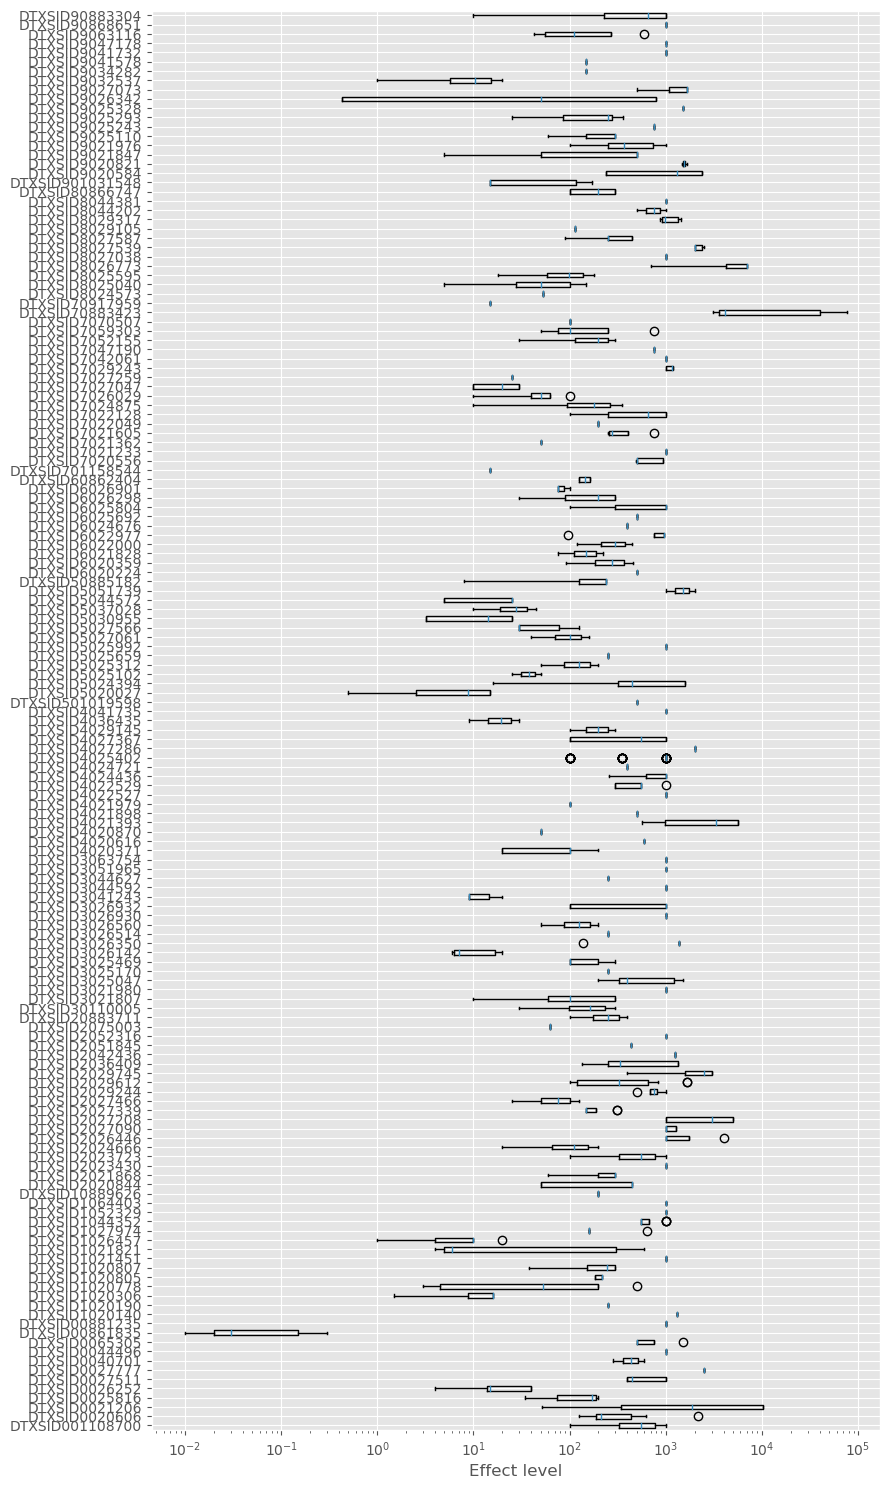

In [145]:

fig, ax = plt.subplots(figsize = (9,15))
labels, data = [*zip(*{k:v for k,v in effect_data.items() if len(v) >1}.items())]
ax.boxplot(data, vert = False)
plt.yticks(range(1, len(labels) +1), labels)
plt.xlabel('Effect level')
plt.xscale('log')
plt.tight_layout()
fig.savefig(figures_dir+'effect_data.png', dpi = 300)

In [146]:
echa_source_data = pd.DataFrame(list({k:np.percentile(v,10) for k,v in effect_data.items() if len(v)  !=0 }.items()), columns = ['source_dtxsid', '10pte_POD'])

In [147]:
echa_source_dict = {k:np.percentile(v,10) for k,v in effect_data.items() if len(v)  !=0 }

In [148]:
pred_df

,dtxsid,pred_pPOD,MolWeight,nbHBdAcc,ndHBdDon,LogP_pred,pred_POD
0,DTXSID4027315,-0.000849,NaN,NaN,NaN,NaN,NaN
1,DTXSID1027269,0.304890,224.250401,0.0,0.0,8.06,111.133088
2,DTXSID5026914,0.389006,168.187801,0.0,0.0,6.03,68.673367
3,DTXSID4027367,0.340977,196.219101,0.0,0.0,7.08,89.487939
4,DTXSID9047596,0.397844,198.161980,2.0,0.0,3.48,79.282307
...,...,...,...,...,...,...,...
265,DTXSID4020539,0.862260,193.089149,1.0,0.0,2.76,26.515351
266,DTXSID6040111,-0.497168,116.083730,2.0,0.0,1.71,364.702951
267,DTXSID4042206,0.537163,253.240565,2.0,0.0,4.20,73.514118
268,DTXSID501104446,0.659219,512.158628,1.0,0.0,5.70,112.249861


In [149]:
reach_pairs3_qsmi['effect_level'] = reach_pairs3_qsmi['source_DSSTox_Substance_Id'].apply(lambda x: echa_source_dict[x] if x in echa_source_dict else np.nan )

In [150]:
reach_pairs3_qsmi

,source_DSSTox_Substance_Id,source_Substance_Name,source_Substance_CASRN,source_Substance_Type,source_Structure_SMILES,source_Structure_SMILES_2D-QSAR,target_DSSTox_Substance_Id,target_Substance_Name,target_Substance_Type,target_Substance_CASRN,target_Structure_SMILES,target_Structure_SMILES_2D-QSAR,effect_level
1,DTXSID3026932,1-Octadecene,112-88-9,Single Compound,CCCCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCCCC=C,DTXSID1027269,1-Hexadecene,Single Compound,629-73-2,CCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCC=C,100.000
16,DTXSID4025402,1-Hexene,592-41-6,Single Compound,CCCCC=C,CCCCC=C,DTXSID5026914,1-Dodecene,Single Compound,112-41-4,CCCCCCCCCCC=C,CCCCCCCCCCC=C,101.000
20,DTXSID3026932,1-Octadecene,112-88-9,Single Compound,CCCCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCCCC=C,DTXSID4027367,1-Tetradecene,Single Compound,1120-36-1,CCCCCCCCCCCCC=C,CCCCCCCCCCCCC=C,100.000
25,DTXSID0044496,6-Pentyltetrahydro-2H-pyran-2-one,705-86-2,Mixture of Stereoisomers,CCCCCC1CCCC(=O)O1,CCCCCC1CCCC(=O)O1,DTXSID9047596,delta-Dodecalactone,Mixture of Stereoisomers,713-95-1,CCCCCCCC1CCCC(=O)O1,CCCCCCCC1CCCC(=O)O1,1000.000
29,DTXSID00861835,Fluocortolone,152-97-6,Single Compound,[H][C@@]12C[C@@H](C)[C@H](C(=O)CO)[C@@]1(C)C[C...,[H][C@@]12C[C@@H](C)[C@H](C(=O)CO)[C@@]1(C)C[C...,DTXSID401036250,6alpha-Fluoro-11beta-hydroxy-21-valeryloxy-16a...,Single Compound,36130-02-6,[H][C@@]12C[C@@H](C)[C@]([H])(C(=O)COC(=O)CCCC...,[H][C@@]12C[C@@H](C)[C@]([H])(C(=O)COC(=O)CCCC...,0.017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,DTXSID1024835,3-Phenylprop-2-enal,104-55-2,Mixture of Stereoisomers,O=CC=CC1=CC=CC=C1,O=C\C=C\C1=CC=CC=C1,DTXSID0059089,"Formamide, N-methyl-N-phenyl-",Single Compound,93-61-8,CN(C=O)C1=CC=CC=C1,CN(C=O)C1=CC=CC=C1,125.000
4999,DTXSID6024834,(2E)-3-Phenylprop-2-enal,14371-10-9,Single Compound,O=C\C=C\C1=CC=CC=C1,O=C\C=C\C1=CC=CC=C1,DTXSID0059089,"Formamide, N-methyl-N-phenyl-",Single Compound,93-61-8,CN(C=O)C1=CC=CC=C1,CN(C=O)C1=CC=CC=C1,NaN
5007,DTXSID1021324,"1,1,1,2-Tetrafluoroethane",811-97-2,Single Compound,FCC(F)(F)F,FCC(F)(F)F,DTXSID0024050,"1,1-Difluoroethane",Single Compound,75-37-6,CC(F)F,CC(F)F,NaN
5008,DTXSID3026514,Phthalimide,85-41-6,Single Compound,O=C1NC(=O)C2=C1C=CC=C2,O=C1NC(=O)C2=C1C=CC=C2,DTXSID4064507,12H-Phthaloperin-12-one,Single Compound,6925-69-5,O=C1N2C(=NC3=C4C(C=CC=C24)=CC=C3)C2=CC=CC=C12,O=C1N2C(=NC3=C4C(C=CC=C24)=CC=C3)C2=CC=CC=C12,250.000


In [151]:
target_dict = {}
for i, group in reach_pairs3_qsmi.groupby('target_DSSTox_Substance_Id'):
    v = list(set(group['effect_level'].dropna()))
    target_dict[i] = v

In [152]:
target_dict = {k:[e for e in v ] for k,v in target_dict.items() if len(v) != 0}

In [153]:
target_expt = pd.DataFrame(list(target_dict.items()))

In [154]:
target_expt.columns = ['target_dtxsid', 1]

target_expt = target_expt.apply(pd.Series.explode)
target_expt.head()

,target_dtxsid,1
0,DTXSID001014636,1000.0
1,DTXSID00204642,1000.0
1,DTXSID00204642,10.0
2,DTXSID0024395,74.3
3,DTXSID0025234,1000.0


In [155]:
target_expt.columns = ['dtxsid', 'echa_POD']

In [156]:
target_expt

,dtxsid,echa_POD
0,DTXSID001014636,1000.0
1,DTXSID00204642,1000.0
1,DTXSID00204642,10.0
2,DTXSID0024395,74.3
3,DTXSID0025234,1000.0
...,...,...
229,DTXSID9047590,14.0
230,DTXSID9047596,1000.0
231,DTXSID9057761,500.0
232,DTXSID9068295,500.0


In [157]:
final_df = pd.merge(pred_df, target_expt, on = 'dtxsid', how = 'left')

final_df

,dtxsid,pred_pPOD,MolWeight,nbHBdAcc,ndHBdDon,LogP_pred,pred_POD,echa_POD
0,DTXSID4027315,-0.000849,NaN,NaN,NaN,NaN,NaN,NaN
1,DTXSID1027269,0.304890,224.250401,0.0,0.0,8.06,111.133088,100.0
2,DTXSID1027269,0.304890,224.250401,0.0,0.0,8.06,111.133088,101.0
3,DTXSID5026914,0.389006,168.187801,0.0,0.0,6.03,68.673367,100.0
4,DTXSID5026914,0.389006,168.187801,0.0,0.0,6.03,68.673367,101.0
...,...,...,...,...,...,...,...,...
322,DTXSID6040111,-0.497168,116.083730,2.0,0.0,1.71,364.702951,500.0
323,DTXSID6040111,-0.497168,116.083730,2.0,0.0,1.71,364.702951,550.0
324,DTXSID4042206,0.537163,253.240565,2.0,0.0,4.20,73.514118,11.1
325,DTXSID501104446,0.659219,512.158628,1.0,0.0,5.70,112.249861,190.0


In [158]:
final_df = final_df.dropna()

In [159]:
min_values = final_df.groupby('dtxsid')['echa_POD'].min().reset_index()

# Merge the original DataFrame with the minimum values DataFrame
result = pd.merge(final_df, min_values, on='dtxsid', suffixes=('', '_min'))
result

,dtxsid,pred_pPOD,MolWeight,nbHBdAcc,ndHBdDon,LogP_pred,pred_POD,echa_POD,echa_POD_min
0,DTXSID1027269,0.304890,224.250401,0.0,0.0,8.06,111.133088,100.0,100.0
1,DTXSID1027269,0.304890,224.250401,0.0,0.0,8.06,111.133088,101.0,100.0
2,DTXSID5026914,0.389006,168.187801,0.0,0.0,6.03,68.673367,100.0,100.0
3,DTXSID5026914,0.389006,168.187801,0.0,0.0,6.03,68.673367,101.0,100.0
4,DTXSID4027367,0.340977,196.219101,0.0,0.0,7.08,89.487939,100.0,100.0
...,...,...,...,...,...,...,...,...,...
279,DTXSID6040111,-0.497168,116.083730,2.0,0.0,1.71,364.702951,500.0,500.0
280,DTXSID6040111,-0.497168,116.083730,2.0,0.0,1.71,364.702951,550.0,500.0
281,DTXSID4042206,0.537163,253.240565,2.0,0.0,4.20,73.514118,11.1,11.1
282,DTXSID501104446,0.659219,512.158628,1.0,0.0,5.70,112.249861,190.0,190.0


In [160]:
result = result.drop_duplicates(subset = ['dtxsid'], keep = 'first')

In [162]:
#result.drop('echa_pPOD', axis = 1, inplace = True)#

In [163]:
final_df2 = result.copy()

In [164]:
final_df2['echa_pPOD'] = final_df2[['echa_POD', 'MolWeight']].apply(lambda x: -np.log10(x['echa_POD']/x['MolWeight']), axis = 1)

In [165]:
final_df2.columns

Index(['dtxsid', 'pred_pPOD', 'MolWeight', 'nbHBdAcc', 'ndHBdDon', 'LogP_pred',
       'pred_POD', 'echa_POD', 'echa_POD_min', 'echa_pPOD'],
      dtype='object')

In [166]:
melted = final_df2.melt(id_vars = 'dtxsid', value_vars = ['pred_pPOD', 'echa_pPOD'])

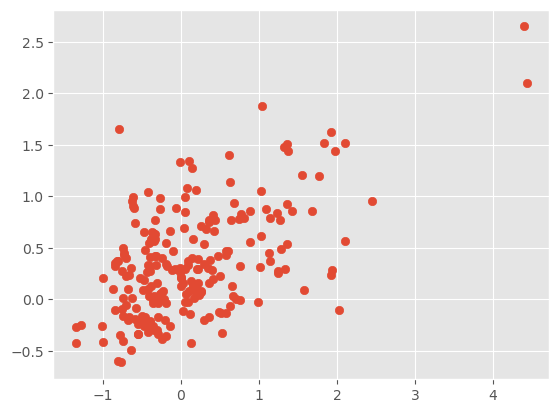

In [167]:
plt.scatter(x = 'echa_pPOD', y = 'pred_pPOD', data = final_df2)

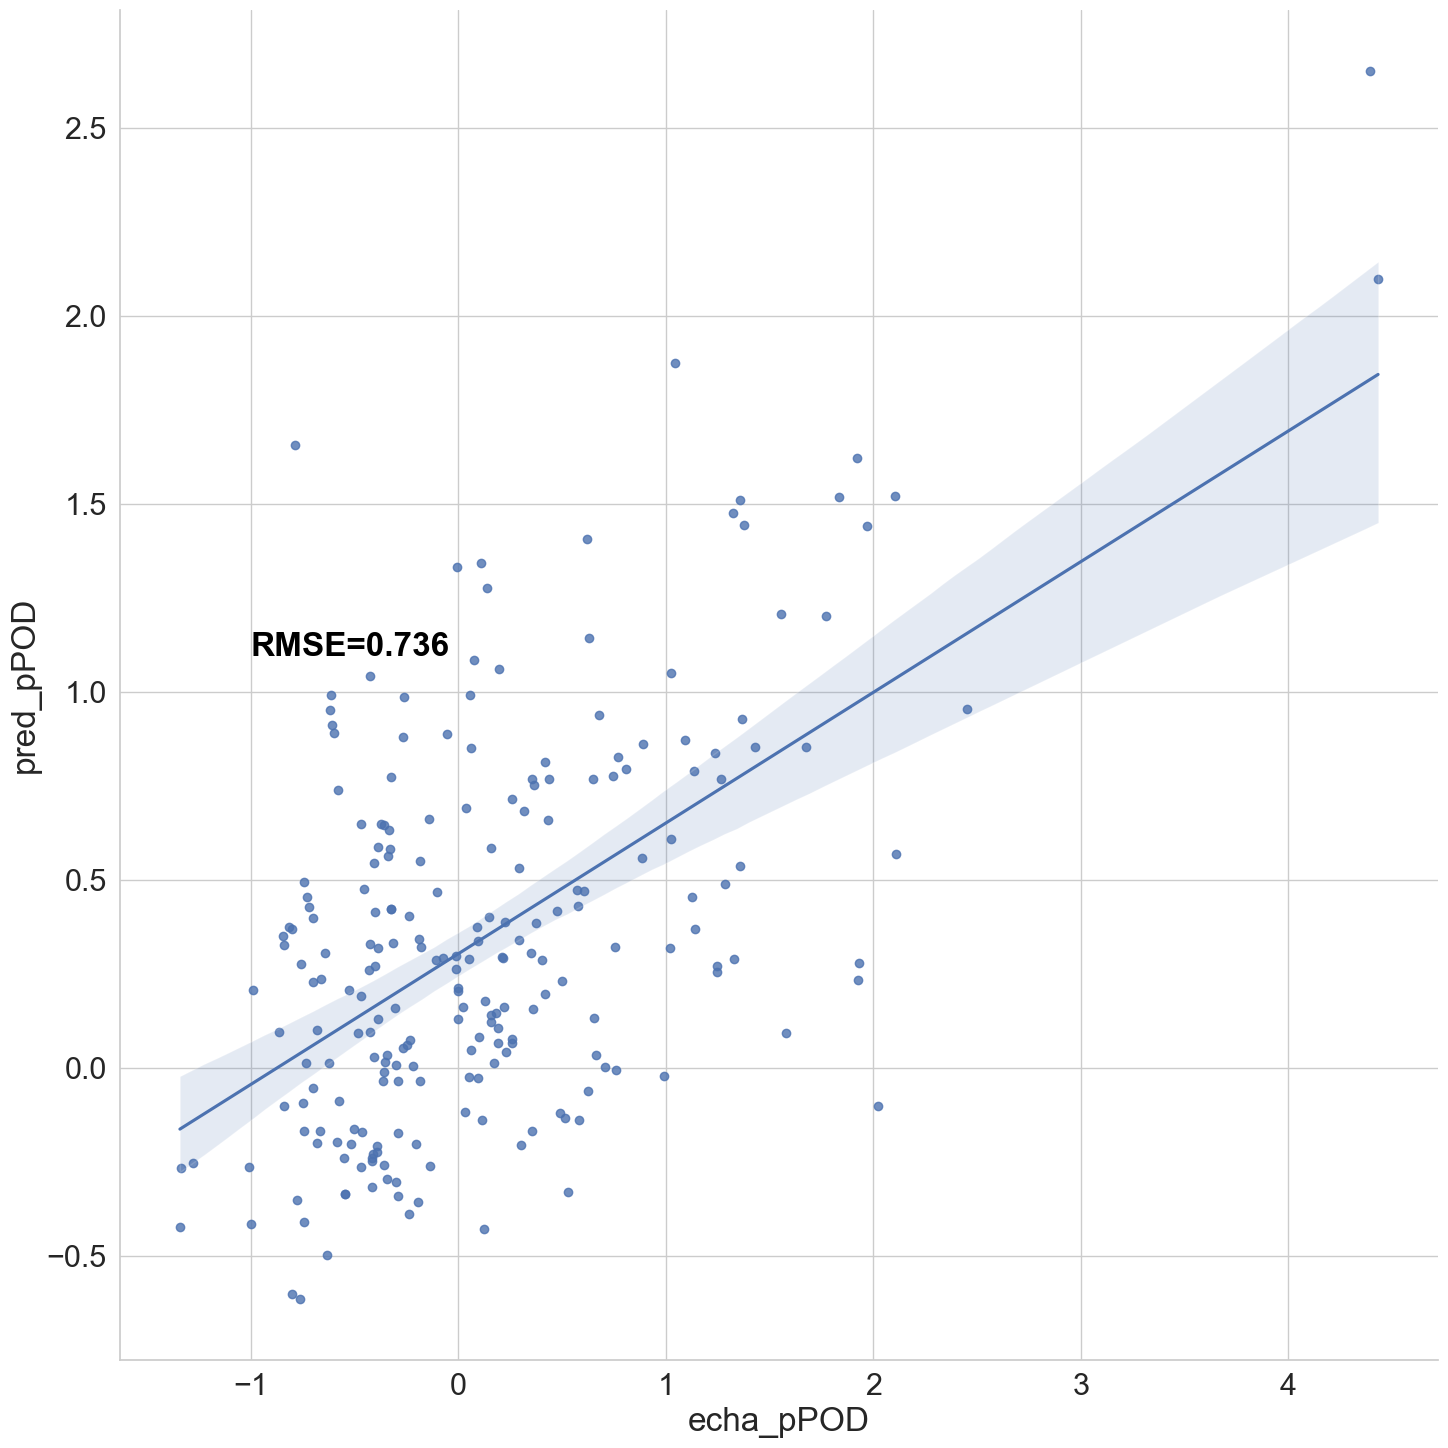

In [168]:
sns.set(style='whitegrid',font_scale=2.0)

g=sns.lmplot(y='pred_pPOD',x='echa_pPOD',data=final_df2,height=15,aspect=1.0)
txt = "RMSE={:0.3f}\n"\
              .format( np.sqrt(((final_df2['pred_pPOD']-final_df2['echa_pPOD'])**2).mean()))
 

for p in g.axes:
    p[0].text(-1, 1, txt, horizontalalignment='left', size='medium', color='black', weight='semibold')

In [169]:
melted = final_df2.melt(id_vars = 'dtxsid', value_vars = ['pred_pPOD', 'echa_pPOD'])

In [170]:
final_df2.shape

(227, 10)

In [171]:
80/227

0.3524229074889868

In [173]:
final_df2[final_df2['pred_POD'] < final_df2['echa_POD_min']]

,dtxsid,pred_pPOD,MolWeight,nbHBdAcc,ndHBdDon,LogP_pred,pred_POD,echa_POD,echa_POD_min,echa_pPOD
2,DTXSID5026914,0.389006,168.187801,0.0,0.0,6.03,68.673367,100.0,100.0,0.225794
4,DTXSID4027367,0.340977,196.219101,0.0,0.0,7.08,89.487939,100.0,100.0,0.292741
6,DTXSID9047596,0.397844,198.161980,2.0,0.0,3.48,79.282307,1000.0,1000.0,-0.702980
13,DTXSID20862324,0.262958,242.260966,1.0,0.0,5.70,132.228699,250.0,250.0,-0.013657
14,DTXSID50867488,-0.206281,405.104874,8.0,3.0,2.26,651.400516,1000.0,1000.0,-0.392433
...,...,...,...,...,...,...,...,...,...,...
274,DTXSID1047609,0.428128,142.099380,2.0,0.0,1.70,53.023044,750.0,750.0,-0.722469
275,DTXSID9044326,-0.196030,156.151415,1.0,1.0,3.34,245.231417,600.0,250.0,-0.584605
279,DTXSID6040111,-0.497168,116.083730,2.0,0.0,1.71,364.702951,500.0,500.0,-0.634199
282,DTXSID501104446,0.659219,512.158628,1.0,0.0,5.70,112.249861,190.0,190.0,0.430651


In [174]:
final_df2[final_df2['pred_POD'] > final_df2['echa_POD_min']]

,dtxsid,pred_pPOD,MolWeight,nbHBdAcc,ndHBdDon,LogP_pred,pred_POD,echa_POD,echa_POD_min,echa_pPOD
0,DTXSID1027269,0.304890,224.250401,0.0,0.0,8.06,111.133088,100.0,100.000,0.350733
7,DTXSID401036250,2.097982,460.262503,5.0,1.0,4.23,3.673025,0.017,0.017,4.432557
8,DTXSID1026615,-0.025452,198.089209,4.0,0.0,1.52,210.045357,160.0,50.000,0.092741
11,DTXSID3026932,0.287413,252.281701,0.0,0.0,8.00,130.158473,100.0,100.000,0.401886
21,DTXSID4041731,0.369391,277.052112,6.0,2.0,1.98,118.350625,20.0,20.000,1.141531
...,...,...,...,...,...,...,...,...,...,...
244,DTXSID9029146,0.105328,101.084064,2.0,0.0,-0.33,79.314970,65.0,65.000,0.191769
246,DTXSID9042178,0.092324,327.313730,3.0,2.0,4.46,264.630557,1000.0,97.000,-0.485036
255,DTXSID10166505,-0.203876,314.245710,4.0,0.0,5.11,502.510625,156.8,156.800,0.301923
277,DTXSID4020539,0.862260,193.089149,1.0,0.0,2.76,26.515351,25.0,14.000,0.887818


In [175]:
def ecdf(data):
    '''
    Calculate the ecdf of a 1d-array
    Returns the x, y needed to plot the empirical ecdf
    '''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

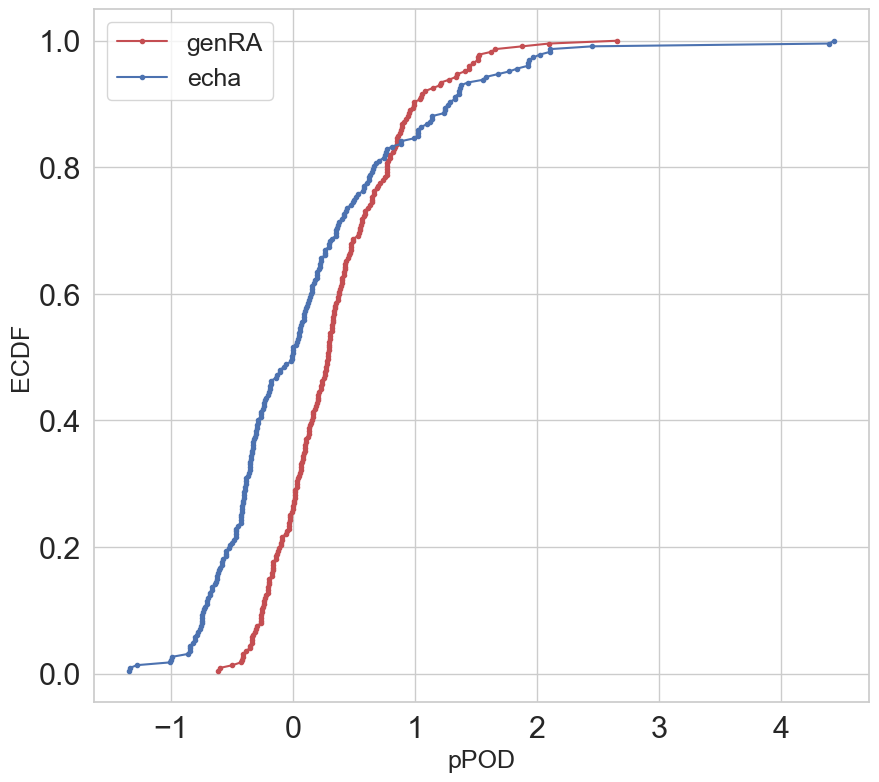

In [177]:
plt.figure(figsize = (10,9))
plt.plot(ecdf(final_df2['pred_pPOD'])[0], ecdf(final_df2['pred_pPOD'])[1], linestyle = None, marker = '.', color = 'r', label = 'genRA')
plt.plot(ecdf(final_df2['echa_pPOD'])[0], ecdf(final_df2['echa_pPOD'])[1], linestyle = None, marker = '.', color = 'b', label = 'echa')
plt.legend(fontsize = 18)
#plt.xscale('log')
plt.xlabel('pPOD', fontsize = 18)
plt.ylabel('ECDF', fontsize = 18)
plt.savefig(figures_dir+'echa_genra.png', dpi = 300)

In [178]:
reach_prs = pd.read_csv(external_dir+'reach_pairs.csv', index_col = [0])

In [179]:
reach_prs.columns


Index(['source_DSSTox_Substance_Id', 'source_DSSTox_Structure_Id',
       'source_DSSTox_QC-Level', 'source_Substance_Name',
       'source_Substance_CASRN', 'source_Substance_Type',
       'source_Substance_Note', 'source_Structure_SMILES',
       'source_Structure_InChI', 'source_Structure_InChIKey',
       'source_Structure_Formula', 'source_Structure_MolWt',
       'source_Structure_SMILES_2D-QSAR', 'target_DSSTox_Substance_Id',
       'target_DSSTox_Structure_Id', 'target_DSSTox_QC-Level',
       'target_Substance_Name', 'target_Substance_CASRN',
       'target_Substance_Type', 'target_Substance_Note',
       'target_Structure_SMILES', 'target_Structure_InChI',
       'target_Structure_InChIKey', 'target_Structure_Formula',
       'target_Structure_MolWt', 'target_Structure_SMILES_2D-QSAR',
       'source_qsarsmi', 'target_qsarsmi'],
      dtype='object')

In [180]:
reach_prs = reach_prs[['target_DSSTox_Substance_Id',
       'target_Substance_Name', 
       'target_Structure_SMILES',  'target_Structure_Formula',
       'target_Structure_MolWt','target_Structure_InChIKey',
       'target_qsarsmi']]

In [181]:
final_df3 = pd.merge(final_df2, reach_prs[['target_DSSTox_Substance_Id',
       'target_Substance_Name', 
       'target_Structure_SMILES',  'target_Structure_Formula','target_qsarsmi','target_Structure_InChIKey']], left_on = 'dtxsid', right_on = 'target_DSSTox_Substance_Id', how = 'left').drop_duplicates(subset = 'dtxsid', keep = 'first')

In [182]:
final_df3[final_df3['pred_POD'] > final_df3['echa_POD_min']]

,dtxsid,pred_pPOD,MolWeight,nbHBdAcc,ndHBdDon,LogP_pred,pred_POD,echa_POD,echa_POD_min,echa_pPOD,target_DSSTox_Substance_Id,target_Substance_Name,target_Structure_SMILES,target_Structure_Formula,target_qsarsmi,target_Structure_InChIKey
0,DTXSID1027269,0.304890,224.250401,0.0,0.0,8.06,111.133088,100.0,100.000,0.350733,DTXSID1027269,1-Hexadecene,CCCCCCCCCCCCCCC=C,C16H32,CCCCCCCCCCCCCCC=C,GQEZCXVZFLOKMC-UHFFFAOYSA-N
13,DTXSID401036250,2.097982,460.262503,5.0,1.0,4.23,3.673025,0.017,0.017,4.432557,DTXSID401036250,6alpha-Fluoro-11beta-hydroxy-21-valeryloxy-16a...,[H][C@@]12C[C@@H](C)[C@]([H])(C(=O)COC(=O)CCCC...,C27H37FO5,CC1CC2C3CC(F)C4=CC(=O)C=CC4(C)C3C(O)CC2(C)C1C(...,ASVQNGFDDHFBPT-VJBCMVKLSA-N
14,DTXSID1026615,-0.025452,198.089209,4.0,0.0,1.52,210.045357,160.0,50.000,0.092741,DTXSID1026615,Ethylene glycol dimethacrylate,CC(=C)C(=O)OCCOC(=O)C(C)=C,C10H14O4,CC(=C)C(=O)OCCOC(=O)C(C)=C,STVZJERGLQHEKB-UHFFFAOYSA-N
18,DTXSID3026932,0.287413,252.281701,0.0,0.0,8.00,130.158473,100.0,100.000,0.401886,DTXSID3026932,1-Octadecene,CCCCCCCCCCCCCCCCC=C,C18H36,CCCCCCCCCCCCCCCCC=C,CCCMONHAUSKTEQ-UHFFFAOYSA-N
34,DTXSID4041731,0.369391,277.052112,6.0,2.0,1.98,118.350625,20.0,20.000,1.141531,DTXSID4041731,C.I. Food Yellow 6,NC1=CC=C(C=C1)N=NC1=CC=C(C=C1)S(O)(=O)=O,C12H11N3O3S,NC1C=CC(=CC=1)N=NC1C=CC(=CC=1)S(O)(=O)=O,PPVRMPPLECDING-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,DTXSID9029146,0.105328,101.084064,2.0,0.0,-0.33,79.314970,65.0,65.000,0.191769,DTXSID9029146,4-Methylmorpholine,CN1CCOCC1,C5H11NO,CN1CCOCC1,SJRJJKPEHAURKC-UHFFFAOYSA-N
310,DTXSID9042178,0.092324,327.313730,3.0,2.0,4.46,264.630557,1000.0,97.000,-0.485036,DTXSID9042178,N-(2-Hydroxyethyl)octadecanamide,CCCCCCCCCCCCCCCCCC(=O)NCCO,C20H41NO2,CCCCCCCCCCCCCCCCCC(=O)NCCO,OTGQIQQTPXJQRG-UHFFFAOYSA-N
320,DTXSID10166505,-0.203876,314.245710,4.0,0.0,5.11,502.510625,156.8,156.800,0.301923,DTXSID10166505,Diheptyl succinate,CCCCCCCOC(=O)CCC(=O)OCCCCCCC,C18H34O4,CCCCCCCOC(=O)CCC(=O)OCCCCCCC,PBZAGXRVDLNBCJ-UHFFFAOYSA-N
343,DTXSID4020539,0.862260,193.089149,1.0,0.0,2.76,26.515351,25.0,14.000,0.887818,DTXSID4020539,Diphenylacetonitrile,N#CC(C1=CC=CC=C1)C1=CC=CC=C1,C14H11N,N#CC(C1C=CC=CC=1)C1C=CC=CC=1,NEBPTMCRLHKPOB-UHFFFAOYSA-N


In [183]:
final_df3.to_csv(external_dir+'final_df3_270823.csv')

In [4]:
final_df3 = pd.read_csv(external_dir+'final_df3_270823.csv', index_col = [0])

In [5]:
final_df3

,dtxsid,pred_pPOD,MolWeight,nbHBdAcc,ndHBdDon,LogP_pred,pred_POD,echa_POD,echa_POD_min,echa_pPOD,target_DSSTox_Substance_Id,target_Substance_Name,target_Structure_SMILES,target_Structure_Formula,target_qsarsmi,target_Structure_InChIKey
0,DTXSID1027269,0.304890,224.250401,0.0,0.0,8.06,111.133088,100.000,100.000,0.350733,DTXSID1027269,1-Hexadecene,CCCCCCCCCCCCCCC=C,C16H32,CCCCCCCCCCCCCCC=C,GQEZCXVZFLOKMC-UHFFFAOYSA-N
4,DTXSID5026914,0.389006,168.187801,0.0,0.0,6.03,68.673367,100.000,100.000,0.225794,DTXSID5026914,1-Dodecene,CCCCCCCCCCC=C,C12H24,CCCCCCCCCCC=C,CRSBERNSMYQZNG-UHFFFAOYSA-N
8,DTXSID4027367,0.340977,196.219101,0.0,0.0,7.08,89.487939,100.000,100.000,0.292741,DTXSID4027367,1-Tetradecene,CCCCCCCCCCCCC=C,C14H28,CCCCCCCCCCCCC=C,HFDVRLIODXPAHB-UHFFFAOYSA-N
11,DTXSID9047596,0.397844,198.161980,2.0,0.0,3.48,79.282307,1000.000,1000.000,-0.702980,DTXSID9047596,delta-Dodecalactone,CCCCCCCC1CCCC(=O)O1,C12H22O2,CCCCCCCC1CCCC(=O)O1,QRPLZGZHJABGRS-UHFFFAOYNA-N
13,DTXSID401036250,2.097982,460.262503,5.0,1.0,4.23,3.673025,0.017,0.017,4.432557,DTXSID401036250,6alpha-Fluoro-11beta-hydroxy-21-valeryloxy-16a...,[H][C@@]12C[C@@H](C)[C@]([H])(C(=O)COC(=O)CCCC...,C27H37FO5,CC1CC2C3CC(F)C4=CC(=O)C=CC4(C)C3C(O)CC2(C)C1C(...,ASVQNGFDDHFBPT-VJBCMVKLSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,DTXSID4020539,0.862260,193.089149,1.0,0.0,2.76,26.515351,25.000,14.000,0.887818,DTXSID4020539,Diphenylacetonitrile,N#CC(C1=CC=CC=C1)C1=CC=CC=C1,C14H11N,N#CC(C1C=CC=CC=1)C1C=CC=CC=1,NEBPTMCRLHKPOB-UHFFFAOYSA-N
345,DTXSID6040111,-0.497168,116.083730,2.0,0.0,1.71,364.702951,500.000,500.000,-0.634199,DTXSID6040111,Ethyl butyrate,CCCC(=O)OCC,C6H12O2,CCOC(=O)CCC,OBNCKNCVKJNDBV-UHFFFAOYSA-N
347,DTXSID4042206,0.537163,253.240565,2.0,0.0,4.20,73.514118,11.100,11.100,1.358210,DTXSID4042206,1-Dodecyl-2-pyrrolidinone,CCCCCCCCCCCCN1CCCC1=O,C16H31NO,CCCCCCCCCCCCN1CCCC1=O,NJPQAIBZIHNJDO-UHFFFAOYSA-N
348,DTXSID501104446,0.659219,512.158628,1.0,0.0,5.70,112.249861,190.000,190.000,0.430651,DTXSID501104446,"rel-(2R,5S)-2-[4′-[Difluoro(3,4,5-trifluorophe...",CCC[C@@H]1CC[C@H](OC1)C1=CC=C(C=C1)C1=CC(F)=C(...,C27H23F7O2,CCCC1COC(CC1)C1C=CC(=CC=1)C1C=C(F)C(=C(F)C=1)C...,FPBFSPUIZMRERG-MYYSRTQBSA-N


In [6]:
std_dev = final_df3.apply(lambda row: np.abs(row['pred_pPOD'] - row['echa_pPOD']), axis=1).std()

In [7]:
final_df3['ExceedsStdDev'] = final_df3.apply(lambda row: np.abs(row['pred_pPOD'] - row['echa_pPOD']) > std_dev, axis=1)


In [8]:
(final_df3['pred_pPOD']/final_df3['echa_pPOD']).mean()

10.028097906697926

In [9]:
(final_df3['pred_POD']/final_df3['echa_POD_min']).mean()

4.0237825569032015

In [10]:
final_df3.to_csv(external_dir+'final_df3_220224.csv')

In [188]:
#classy_data

In [12]:
txps = pd.read_csv(external_dir+'targets_4txps.txt', sep = ';')

In [13]:
txps = txps.iloc[:,:-2]

In [14]:
xsx = {k:v for k,v in zip(final_df3['dtxsid'], final_df3['ExceedsStdDev'])}

In [15]:
#xsx

In [16]:
txps['xs'] = txps['M_NAME'].replace(xsx)

In [17]:
txps

,M_NAME,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,...,ring:polycycle_spiro_[2.2]pentane,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene,xs
0,DTXSID1027269,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1,DTXSID5026914,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,DTXSID4027367,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
3,DTXSID9047596,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
4,DTXSID401036250,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,DTXSID4020539,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
223,DTXSID6040111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
224,DTXSID4042206,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
225,DTXSID501104446,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [18]:
txps['xs1'] = txps['xs'].apply(lambda x : 1 if x is True else 0)

In [19]:
txps

,M_NAME,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,...,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene,xs,xs1
0,DTXSID1027269,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0
1,DTXSID5026914,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0
2,DTXSID4027367,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0
3,DTXSID9047596,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,1
4,DTXSID401036250,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,DTXSID4020539,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0
223,DTXSID6040111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0
224,DTXSID4042206,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,1
225,DTXSID501104446,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,0


In [20]:
txps.drop(['xs'], axis = 1, inplace = True)

In [21]:
txps = txps.set_index(['M_NAME'])

In [22]:
txps = txps.dropna()

In [23]:
txps['xs1'].value_counts()

1    115
0    112
Name: xs1, dtype: int64

In [24]:
txps

,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,bond:C#N_cyano_cyanohydrin,...,ring:polycycle_spiro_[2.2]pentane,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene,xs1
M_NAME,,,,,,,,,,,,,,,,,,,,,
DTXSID1027269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID5026914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID4027367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID9047596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
DTXSID401036250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID4020539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID6040111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID4042206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
from scipy.stats import fisher_exact

In [34]:
res = []
for i, column in txps.iloc[:,:729].iteritems():
    if pd.crosstab(txps.iloc[:,-1],column).shape == (2,2):
        a = pd.crosstab(txps.iloc[:,-1],column)
        tn, fn, fp, tp = a.iloc[0,0], a.iloc[0,1], a.iloc[1,0], a.iloc[1,1]
        oddsratio, pvalue = fisher_exact(pd.crosstab(txps.iloc[:,729],column),alternative = 'greater')
        res.append([oddsratio, pvalue, i, tp])

In [35]:
def convert(lst):
    df = pd.DataFrame(lst)
    df.rename(columns = {0: 'OR', 1: 'p', 2 : 'TxP', 3: 'TP'}, inplace = True)
    df = df.sort_values(by=['OR','p'], ascending = [False, True])
    return df

In [36]:
txp_enrich = convert(res)
txp_enrich

,OR,p,TxP,TP
242,inf,0.003832,ring:hetero_[5]_Z_1-Z,8
238,inf,0.031941,ring:hetero_[5]_O_oxolane,5
6,inf,0.064170,bond:C(=O)N_carboxamide_(NR2),4
249,inf,0.064170,ring:hetero_[6]_N_pyridine,4
250,inf,0.064170,ring:hetero_[6]_N_pyridine_generic,4
...,...,...,...,...
251,0.0,1.000000,ring:hetero_[6]_N_triazine_(1_3_5-),0
252,0.0,1.000000,ring:hetero_[6]_N_triazine_generic,0
253,0.0,1.000000,ring:hetero_[6]_N_O_1_4-oxazine_generic,0
254,0.0,1.000000,ring:hetero_[6]_N_O_1_4-oxazine_morpholine,0


In [37]:
txp_enrich.to_csv(external_dir+'TxP_enrichment.csv')

In [30]:
txp_enrich[(txp_enrich['OR'] >= 3) & (txp_enrich['p'] < 0.05 ) & (txp_enrich['TP']>3)]

,OR,p,TxP,TP
242,inf,0.003832,ring:hetero_[5]_Z_1-Z,8
238,inf,0.031941,ring:hetero_[5]_O_oxolane,5


In [39]:
pd.crosstab(txps.iloc[:,-1],txps.loc[:,'ring:hetero_[5]_Z_1-Z'])

ring:hetero_[5]_Z_1-Z,0,1
xs1,,
0,112,0
1,107,8


In [258]:
#df

In [260]:
all_analogues_df = df[df['DSSTox_Substance_Id'].isin(all_analogues['DTXSID'].tolist())]

In [261]:
all_analogues_df.describe()

,Structure_MolWt,10ptile_POD,pPOD
count,1310.000000,1310.000000,1310.000000
mean,272.785012,359.047537,0.369696
std,199.656179,567.128697,0.887799
min,16.043000,0.005000,-1.748716
25%,150.174750,30.000000,-0.228147
50%,204.357000,123.460000,0.214680
75%,344.495000,500.000000,0.834921
max,1799.290000,5771.000000,4.875906


In [262]:
analogues_txps = pd.read_csv(external_dir+'toxvalout_4txps.txt', sep = ';')

In [265]:
analogues_txps = analogues_txps[analogues_txps['M_NAME'].isin(all_analogues['DTXSID'].tolist())]

In [269]:
#analogues_txps = analogues_txps.set_index('M_NAME')

In [271]:
all_analogues_df[all_analogues_df['DSSTox_Substance_Id'].isin(analogues_txps[analogues_txps['ring:hetero_[5]_O_oxolane']==1].index)].describe()              

,Structure_MolWt,10ptile_POD,pPOD
count,34.000000,34.000000,34.000000
mean,230.001265,120.668794,0.497037
std,194.268299,139.433774,0.554563
min,30.026000,0.720000,-0.521466
25%,131.162750,31.043750,0.153789
50%,156.146500,53.550000,0.478561
75%,207.281250,142.122500,0.693857
max,879.860000,500.000000,2.407952


In [272]:
all_analogues_df[all_analogues_df['DSSTox_Substance_Id'].isin(analogues_txps[analogues_txps['ring:hetero_[5]_Z_1-Z']==1].index)].describe()

,Structure_MolWt,10ptile_POD,pPOD
count,52.000000,52.000000,52.000000
mean,230.802596,172.290038,0.495027
std,168.223934,254.691224,0.682446
min,30.026000,0.720000,-0.888875
25%,137.393250,26.950000,0.057724
50%,164.676000,53.550000,0.450698
75%,272.740750,177.500000,0.755054
max,879.860000,1020.000000,2.481122
